# Multiple Linear regression

**To find the profit of a startup company based on features like R&D spend,Administration, marketing spend and the state of the company**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv(r'C:/Users/Bagavathi Priya/Downloads/50_Startups.csv')

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Feature Engineering

In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**The minimum profit of the startup's is 14k something and the max profit is around 2L**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### We can see that the data is in a proper manner without any missing values

In [13]:
df.shape

(50, 5)

### The data consists of five features(columns) and 50 records(rows)

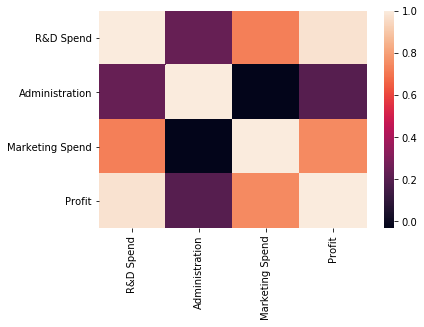

In [10]:
sns.heatmap(df.corr())

### From the heat map  we can able to see that R&D and profit are higly correlated

### Profit and Marketing spend are slightly correlated

{'whiskers': [<matplotlib.lines.Line2D at 0x2146222bec8>,
 'caps': [<matplotlib.lines.Line2D at 0x21462231bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2146222b888>],
 'medians': [<matplotlib.lines.Line2D at 0x21462231d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x21462236c08>],
 'means': []}

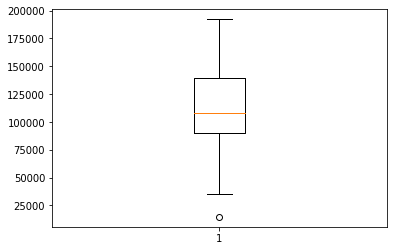

In [15]:
plt.boxplot(df['Profit'])

### From the box plot, we can see that the min value of profit around 35k, median around 1L, max around 2L and there is a outlier at the bottom of the plot

Text(0, 0.5, 'Profit')

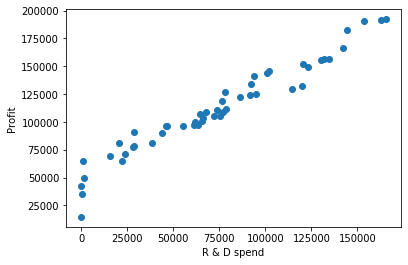

In [17]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R & D spend')
plt.ylabel('Profit')

### As we know R&D and profit are highly correlated, It is clear from the scatter plot, that these two features are positively correlated

# Data cleaning

### As the state field is of categorical type, we have to convert them into a numerical value, so that algorithm understands the data and accept to prepare the model

In [19]:
new_state=pd.get_dummies(df['State'],drop_first=True)

In [21]:
new_state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


**The drop_first parameter drops the first column, so it decreases the space, we can get the meaning of state even with the column florida and New york**

In [23]:
df.drop(['State'],axis=1,inplace=True)

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


**Successfully dropped and have to add those new_state columns**

In [25]:
type(new_state)

pandas.core.frame.DataFrame

In [28]:
df_new=pd.concat([df,new_state],axis=1)

In [29]:
df_new.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


**Fine the data is perfect now**

# Splitting Features and Labels

In [32]:
y=df_new['Profit']

In [37]:
x=df_new.drop('Profit',axis=1)

In [38]:
type(x)

pandas.core.frame.DataFrame

In [39]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


# Train Test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=22)

# Model developement

In [42]:
# Multiple Linear regression

from sklearn.linear_model import LinearRegression

In [43]:
reg=LinearRegression()

reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02,  1.98788793e+02,
       -4.18870191e+01])

**The above are the coefficients of the multiple linear regression model**

# Accuracy

In [46]:
from sklearn.metrics import mean_squared_error,r2_score

In [48]:
pred=reg.predict(xtest)

In [52]:
import numpy as np

rmse=np.sqrt(mean_squared_error(ytest,pred))
rmse

5809.43302305295

In [53]:
r2=r2_score(ytest,pred)
r2

0.9806313622809583

**The model has a good accuracy of 98% in the test data**

# Prediction

In [54]:
xtrain.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Florida',
       'New York'],
      dtype='object')

## Task 1

**To make a single prediction of the profit a start up with R&D spend =160000, Admin Spend = 130000, Marketing Spend=300000 ans state = California.**

In [56]:
res=reg.predict([[16000,130000,300000,0,0]])

In [58]:
print('Profit for the startup with the above details is Rs.',res)

Profit for the startup with the above details is Rs. [67605.11041669]


## Task 2

### Get the final regression equation with the final values of the coefficients.

In [59]:
reg.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02,  1.98788793e+02,
       -4.18870191e+01])